In [1]:
import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
tf.__version__

'2.1.2'

In [3]:
graphgallery.__version__

'0.4.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets/", verbose=False)
graph = data.graph
idx_train, idx_val, idx_test = data.split_nodes()


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

In [6]:
from graphgallery.nn.models import ClusterGCN
model = ClusterGCN(graph, n_clusters=10, attr_transform="normalize_attr", device='GPU', seed=123)
model.build()
# train with validation
his = model.train(idx_train, idx_val, verbose=1, epochs=50)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


Training...
50/50 [==============================] - 3s 52ms/step - loss: 0.0360 - acc: 1.0000 - val_loss: 1.1641 - val_acc: 0.7800 - time: 2.6072
Testing...
10/10 [==============================] - 0s 2ms/step - test_loss: 1.2101 - test_acc: 0.8230 - time: 0.0188
Test loss 1.2101, Test accuracy 82.30%


## Show model summary

In [7]:
model.summary()

Model: "gcn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attr_matrix (InputLayer)        [(None, 1433)]       0                                            
__________________________________________________________________________________________________
adj_matrix (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
graph_convolution (GraphConvolu (None, 32)           45856       attr_matrix[0][0]                
                                                                 adj_matrix[0][0]                 
__________________________________________________________________________________________________
dropout (Dropout)               (None, 32)           0           graph_convolution[0][0]        

## Visualization Training 

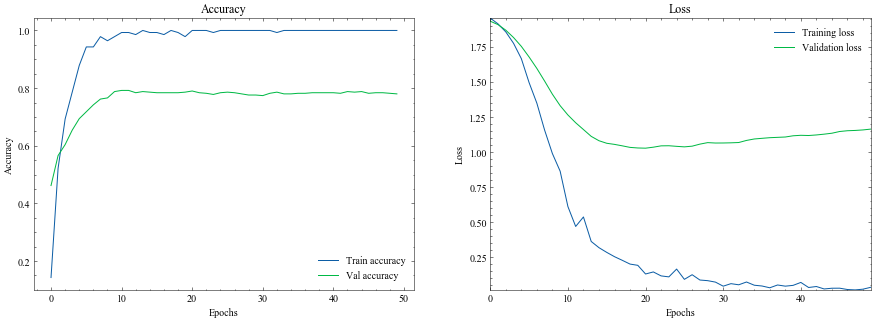

In [8]:
import matplotlib.pyplot as plt
with plt.style.context(['science', 'no-latex']):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].plot(his.history['acc'], label='Training accuracy')
    axes[0].plot(his.history['val_acc'], label='Validation accuracy')
    axes[0].legend()
    axes[0].set_title('Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')


    axes[1].plot(his.history['loss'], label='Training loss')
    axes[1].plot(his.history['val_loss'], label='Validation loss')
    axes[1].legend()
    axes[1].set_title('Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    
    plt.autoscale(tight=True)
    plt.show()    